## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = combined_data = pd.merge(mouse_metadata, study_results, how = "inner",on = "Mouse ID")
# Display the data table for preview
combined_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [24]:
# Checking the number of mice.
number_of_mice =len(combined_data["Mouse ID"].unique())
print(number_of_mice)

249


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]

id_of_duplicated_mouse_array = (duplicate["Mouse ID"].unique())
id_of_duplicated_mouse = id_of_duplicated_mouse_array[0]
id_of_duplicated_mouse



'g989'

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]
print(duplicate)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != id_of_duplicated_mouse,:]

In [28]:
# Checking the number of mice in the clean DataFrame.

updated_number_of_mice = len(clean_data["Mouse ID"].unique())
print(updated_number_of_mice)

248


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_data = clean_data.groupby(["Drug Regimen"])
statistics_by_drug = pd.DataFrame({"Mean": grouped_data["Tumor Volume (mm3)"].mean() })
statistics_by_drug["Median"] = grouped_data["Tumor Volume (mm3)"].median()
statistics_by_drug["Variance"] = grouped_data["Tumor Volume (mm3)"].var()
statistics_by_drug["Standard Deviation"] = (grouped_data["Tumor Volume (mm3)"]).std()
statistics_by_drug["SEM"] = (grouped_data["Tumor Volume (mm3)"]).sem()


statistics_by_drug

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
statistics_by_drug_part2 = clean_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

statistics_by_drug_part2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

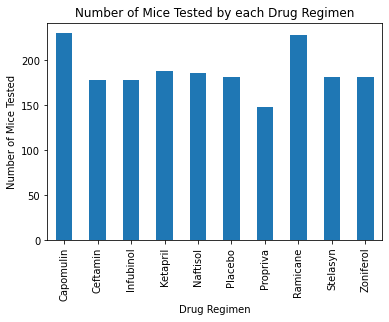

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
group_data_by_drug_regimen = clean_data.groupby(["Drug Regimen"])
drugregimen_and_timpoints_df = group_data_by_drug_regimen["Timepoint"].count()
bar_plot = drugregimen_and_timpoints_df.plot(kind="bar", title = "Number of Mice Tested by each Drug Regimen");
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested");



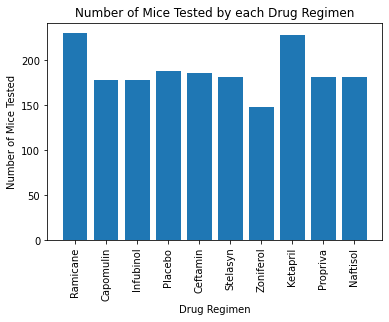

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_counts = group_data_by_drug_regimen["Timepoint"].count() 
x_axis = clean_data["Drug Regimen"].unique()
plt.bar(x_axis, total_counts)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by each Drug Regimen")
plt.show()


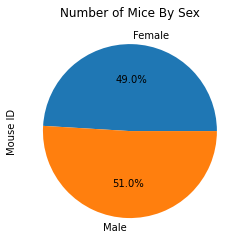

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_data_by_sex = clean_data.groupby(["Sex"])
drugregimen_and_timepoints_df = grouped_data_by_sex["Mouse ID"].count()
drugregimen_and_timepoints_df.plot(kind="pie",y= "Sex", title = "Number of Mice By Sex", autopct="%1.1f%%" );


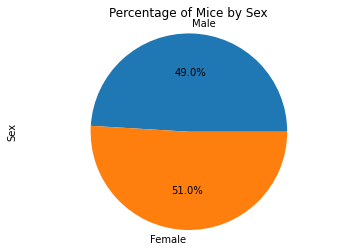

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drugregimen_and_timepoints_df2 = pd.DataFrame({"Count": grouped_data_by_sex["Mouse ID"].count() })

sizes = drugregimen_and_timepoints_df2["Count"]
labels = ["Male", "Female"]
plt.pie(sizes, labels = labels, autopct="%1.1f%%");
plt.ylabel("Sex");
plt.title("Percentage of Mice by Sex");
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouseid = clean_data.groupby(["Mouse ID"])
max_timepoint_df = pd.DataFrame({"Timepoint" :grouped_by_mouseid["Timepoint"].max() })

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_df= max_timepoint_df.merge(clean_data,how = "left", on = ["Mouse ID","Timepoint"])

new_df_filtered = new_df[(new_df["Drug Regimen"]== "Capomulin") | (new_df["Drug Regimen"]== "Ramicane") | (new_df["Drug Regimen"]== "Infubinol")] 

new_df_filtered.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    volume = new_df_filtered.loc[new_df_filtered["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data_list.append(volume)

    calculated_quartiles = volume.quantile([.25,.5,.75])
    lowerq = calculated_quartiles[0.25]
    upperq = calculated_quartiles[0.75]
    IQR = upperq - lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    outliers = volume.loc[(volume > upper_bound) | (volume < lower_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {treatment} are {outliers}")
    else:
        print(f"There are no outliers for {treatment}")


There are no outliers for Capomulin
There are no outliers for Ramicane
The outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
There are no outliers for Ceftamin


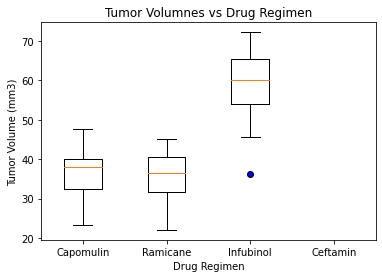

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data_list, flierprops=dict(markerfacecolor='b', marker='o'), labels = treatments)
plt.title("Tumor Volumnes vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

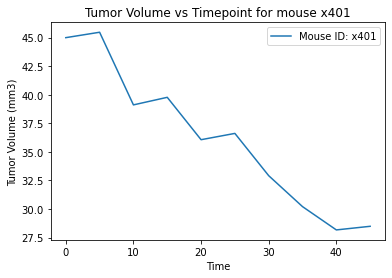

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_with_capomulin_df = clean_data[clean_data["Drug Regimen"]=="Capomulin"]
mouses_ids = mouse_with_capomulin_df["Mouse ID"].unique()
first_mouse_id = mouses_ids[1]
mouse_info_df = clean_data[clean_data["Mouse ID"] == first_mouse_id]

x_axis = mouse_info_df["Timepoint"];
y_axis = mouse_info_df["Tumor Volume (mm3)"];
#Generate line plot
plt.plot(x_axis, y_axis, label = "Mouse ID: " + first_mouse_id);
plt.title("Tumor Volume vs Timepoint for mouse " + first_mouse_id);
plt.xlabel("Time");
plt.ylabel("Tumor Volume (mm3)");
plt.legend();

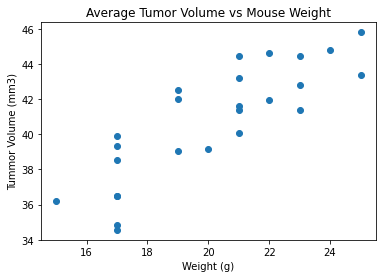

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_by_mouseid_capomulin_df = mouse_with_capomulin_df.groupby(["Mouse ID"])

mean_data_df = pd.DataFrame({"Mean Tumor Volume": grouped_by_mouseid_capomulin_df["Tumor Volume (mm3)"].mean()})
mean_data_df["Weight"] = grouped_by_mouseid_capomulin_df["Weight (g)"].mean()

y_axis = mean_data_df["Mean Tumor Volume"];
x_axis = mean_data_df["Weight"];
plt.scatter(x_axis,y_axis);
plt.title("Average Tumor Volume vs Mouse Weight");
plt.xlabel("Weight (g)");
plt.ylabel("Tummor Volume (mm3)");

## Correlation and Regression

The line equation is y= 0.95x + 21.55
The r-squared is 0.71
The correlation between both factors is 0.84


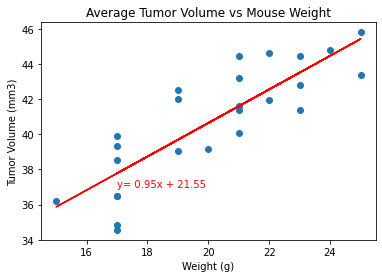

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_axis,y_axis);
(slope, intercept, rvalue,pvalue,stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(17,37), fontsize = 10, color = "red")
plt.title("Average Tumor Volume vs Mouse Weight");
plt.xlabel("Weight (g)");
plt.ylabel("Tumor Volume (mm3)");
print("The r-squared is %.2f" % (rvalue**2))
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()